In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [667]:
atac_true = sc.read_h5ad('/workspace/scButterfly/data/lymphoma/lymphoma_ATAC_pp.h5ad')

In [670]:
atac_true.obs['group'] = atac_true.obs['Cell Types'].map(
    lambda x: 'B' if x in ['B'] else ('LYM' if x in ['Tumor B', 'Tumor B cycling'] else None)
)
data_true = atac_true[atac_true.obs['group'].isin(['B','LYM'])].copy()

sc.pp.log1p(data_true)

sc.tl.rank_genes_groups(
    data_true,
    groupby='group',
    groups=['LYM'],
    reference='B',
    method='wilcoxon',
    pts=True
)

dp_true = sc.get.rank_genes_groups_df(data_true, group='LYM')
dp_true['neg_log10_padj'] = -np.log10(dp_true['pvals_adj'].replace(0, np.nan))

In [675]:
dp_true

,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,neg_log10_padj
0,chr18:79425205-79467412,28.694569,4.096193,4.459502e-181,3.200406e-176,0.900956,175.494795
1,chr9:136653125-136698758,28.359581,4.507428,6.376825e-177,2.288196e-172,0.885929,171.640507
2,chr9:136492663-136559973,28.165976,3.880854,1.527416e-174,3.653884e-170,0.923156,169.437245
3,chr9:137062469-137093487,27.810081,3.867752,3.276086e-170,5.877789e-166,0.899249,165.230786
4,chr9:137293050-137322378,27.644924,4.215601,3.211864e-168,4.610052e-164,0.865779,163.336294
...,...,...,...,...,...,...,...
71761,chr19:49765964-49767869,-4.971933,-1.670413,6.628849e-07,3.259737e-06,0.066598,5.486817
71762,chr4:80201596-80203786,-5.430882,-1.611477,5.607603e-08,3.053610e-07,0.081967,6.515186
71763,chr6:131062205-131063855,-6.001941,-2.416129,1.949727e-09,1.205411e-08,0.046107,7.918865
71764,chr2:207164057-207167547,-6.640017,-1.574628,3.136479e-11,2.247554e-10,0.106557,9.648290


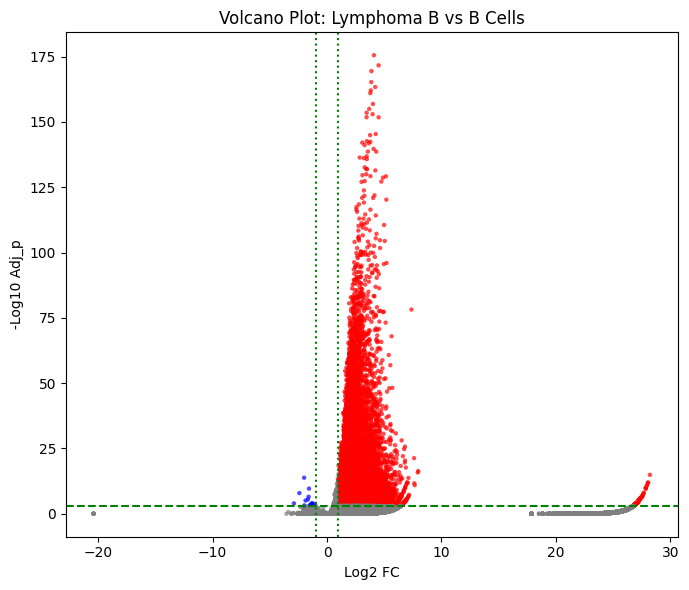

In [674]:
df = dp_true.copy()
df['color'] = 'grey'
df.loc[(df['logfoldchanges'] > 1) & (df['pvals_adj'] < 0.001), 'color'] = 'red'
df.loc[(df['logfoldchanges'] < -1) & (df['pvals_adj'] < 0.001), 'color'] = 'blue'

plt.figure(figsize=(7, 6))
plt.scatter(df['logfoldchanges'], df['neg_log10_padj'], s=10, alpha=0.7, c=df['color'], edgecolor='none')
plt.axhline(-np.log10(0.001), color='green', linestyle='--')
plt.axvline(1, color='green', linestyle='dotted')
plt.axvline(-1, color='green', linestyle='dotted')

# sig_df = df[df['pvals_adj'] < 0.001]
# top_up = sig_df.sort_values(by='logfoldchanges', ascending=False).head(10)
# top_down = sig_df.sort_values(by='logfoldchanges', ascending=True).head(10)

# for _, row in pd.concat([top_up, top_down]).iterrows():
#     plt.text(row['logfoldchanges'], row['neg_log10_padj'],
#              row['names'], fontsize=7, ha='center', va='bottom', color='black')

plt.xlabel('Log2 FC')
plt.ylabel('-Log10 Adj_p')
plt.title('Volcano Plot: Lymphoma B vs B Cells')
plt.tight_layout()
plt.show()